In [41]:
import sys
sys.path.append('../')

from collections import Counter
from math import log
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation


from evolution import Evolver

def shannon(string):
    counts = Counter(string)
    str_len = len(string)
    frequencies = ((i / str_len) for i in counts.values())
    return(-sum(f * log(f, 2) for f in frequencies))

#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))


In [30]:
evolver =  Evolver("flatrates")
x = []
for _ in range(10000):
    x.append(shannon(evolver.randomseq(25)))


In [31]:
evolver =  Evolver("codonrates")
y = []
for _ in range(10000):
    y.append(shannon(evolver.randomseq(24)))


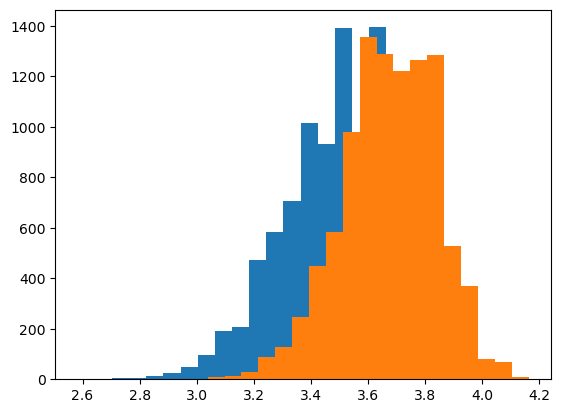

In [32]:
hist = plt.hist(y, bins=25)
hist = plt.hist(x, bins=25)

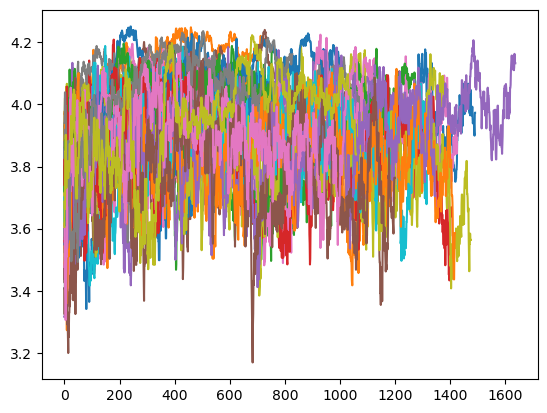

In [35]:
for i in range(1,30):
    lineage = pd.read_csv(f'../../SCR/run{i}/visual_pfes_results/lineage.tsv', sep='\t', comment='#')
    y = []
    for seq in lineage.sequence:
        y.append(shannon(seq))
    plt.plot(y)

In [ ]:
lineage = pd.read_csv(f'../../SCR/run26/visual_pfes_results/lineage.tsv', sep='\t', comment='#')
bestlog = pd.read_csv(f'../../SCR/run26/visual_pfes_results/bestlog.tsv', sep='\t', comment='#')
log = pd.read_csv(f'../../SCR/run26/progress.log', sep='\t', comment='#')


In [113]:
df = bestlog

df['cd'] = df.num_conts / df.seq_len

import plotly.express as px
fig = px.scatter_3d(df, x='mean_plddt', y='ptm', z='score',
              color='score', width=600, height=600)
fig.update_traces(marker_size = 3)
#fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=True )
fig.show()



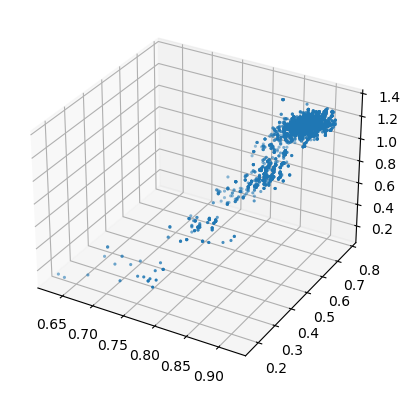

In [100]:
# Create your 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z, = df.mean_plddt, df.ptm, df.score
scatter = ax.scatter(x, y, z, linewidths=0.01, marker='.')

In [106]:
# Animate it
# This function shows the 3d plot from ith angle
def animate(i):
    print(i, end="\n")
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate, frames=360, interval=2, blit=True) # I don't remember what interval=10 and blit=True do
anim.save('your_file_name.gif', dpi=150, writer='imagemagick')


AttributeError: 'Figure' object has no attribute 'canvas'